In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error
from warnings import simplefilter
simplefilter(action='ignore')
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline


2023-12-07 16:23:25.806153: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# CNN for MIT-BIH Arrhythmia Dataset

mit_train_data = pd.read_csv("mitbih_train.csv", header = None)
mit_test_data = pd.read_csv("mitbih_test.csv", header = None)

train_data = mit_train_data.copy()
test_data = mit_test_data.copy()

In [3]:
# Print some data for train dataset

train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Print some data for test dataset

test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Get infr for the data frame
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [6]:
# Describe the data frame
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [7]:
train_data.shape

(87554, 188)

In [8]:
# convert target values to integers
train_data[187]=train_data[187].astype(int)

In [9]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [10]:
## Pre - Processing of dataset      ======================================================================

In [11]:
mit_train_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [12]:
# count the number of NaN values in each column

train_data.fillna(train_data.mean(), inplace=True)

print(train_data.isnull().sum())

train_data.head()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [13]:
# count the number of NaN values in each column

test_data.fillna(test_data.mean(), inplace=True)
print(test_data.isnull().sum())
test_data.head()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Resampling
from sklearn.utils import resample

df_1=train_data[train_data[187]==1]
df_2=train_data[train_data[187]==2]
df_3=train_data[train_data[187]==3]
df_4=train_data[train_data[187]==4]
df_0=(train_data[train_data[187]==0]).sample(n=18000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=18000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=18000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=18000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=18000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])


df_11=test_data[test_data[187]==1]
df_22=test_data[test_data[187]==2]
df_33=test_data[test_data[187]==3]
df_44=test_data[test_data[187]==4]
df_00=(test_data[test_data[187]==0]).sample(n=18000,random_state=42)

df_11_upsample=resample(df_11,replace=True,n_samples=18000,random_state=123)
df_22_upsample=resample(df_22,replace=True,n_samples=18000,random_state=124)
df_33_upsample=resample(df_33,replace=True,n_samples=18000,random_state=125)
df_44_upsample=resample(df_44,replace=True,n_samples=18000,random_state=126)

test_df=pd.concat([df_00,df_11_upsample,df_22_upsample,df_33_upsample,df_44_upsample])


equilibre=train_df[187].value_counts()
print(equilibre)

0    18000
1    18000
2    18000
3    18000
4    18000
Name: 187, dtype: int64


In [15]:
print("ALL Train data")
print("Type\tCount")
print((mit_train_data[187]).value_counts())
print("-------------------------")
print("ALL Test data")
print("Type\tCount")
print((mit_test_data[187]).value_counts())

print("ALL Balanced Train data")
print("Type\tCount")
print((train_df[187]).value_counts())
print("-------------------------")
print("ALL Balanced Test data")
print("Type\tCount")
print((test_df[187]).value_counts())

ALL Train data
Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
-------------------------
ALL Test data
Type	Count
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64
ALL Balanced Train data
Type	Count
0    18000
1    18000
2    18000
3    18000
4    18000
Name: 187, dtype: int64
-------------------------
ALL Balanced Test data
Type	Count
0.0    18000
1.0    18000
2.0    18000
3.0    18000
4.0    18000
Name: 187, dtype: int64


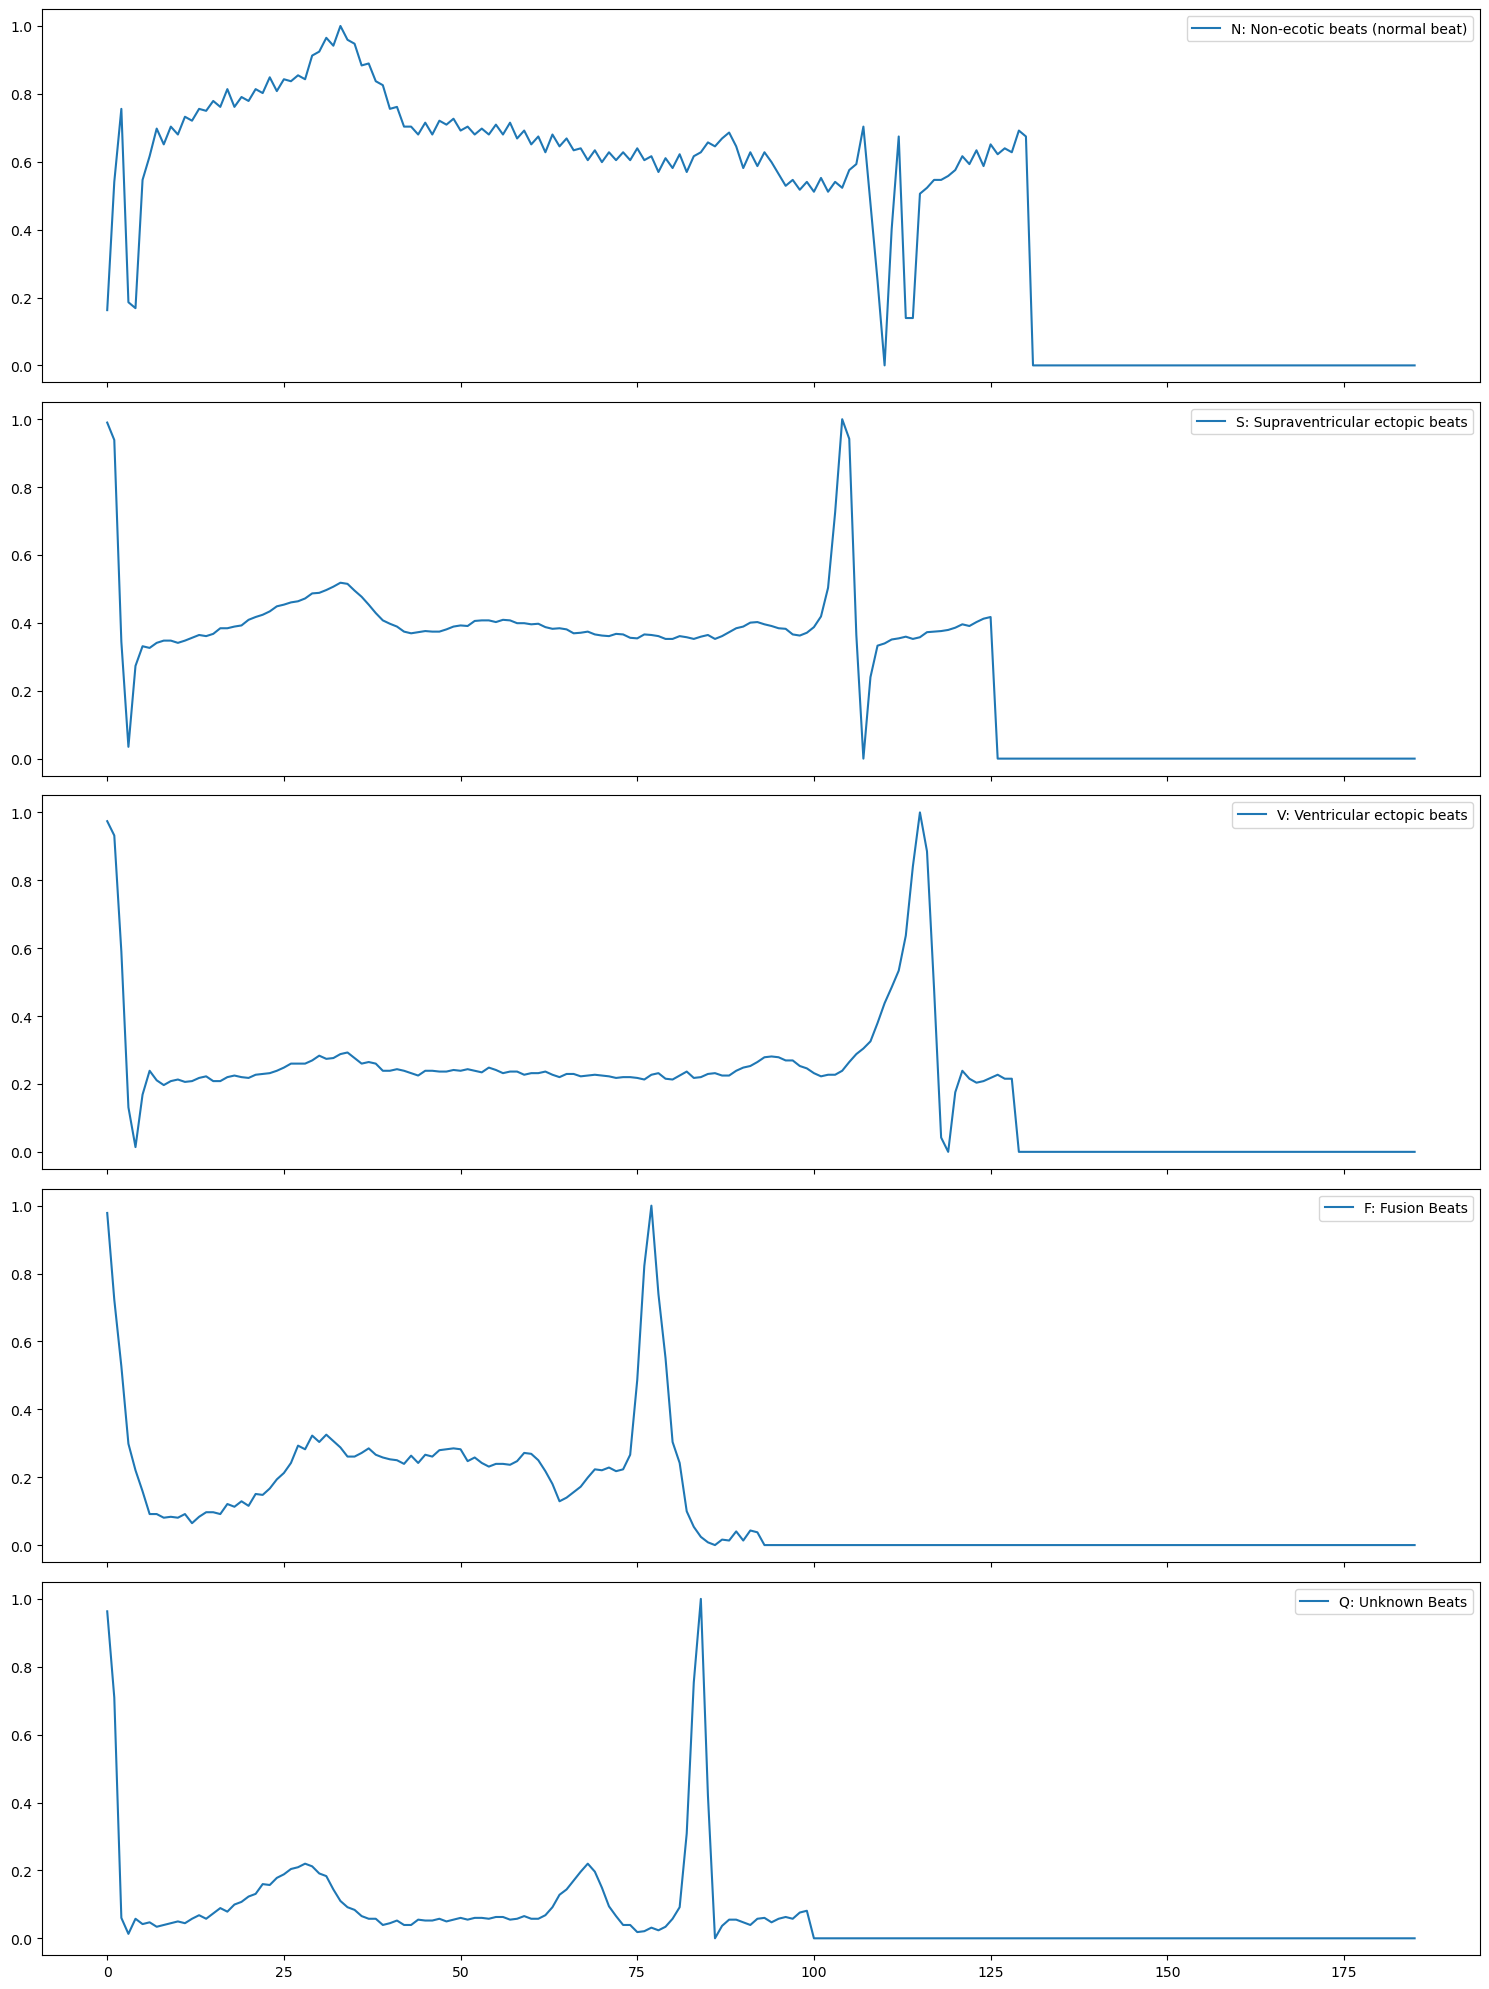

In [16]:
classes = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}
class_descriptions = {
    'N': 'Non-ecotic beats (normal beat)',
    'S': 'Supraventricular ectopic beats',
    'V': 'Ventricular ectopic beats',
    'F': 'Fusion Beats',
    'Q': 'Unknown Beats'
}

fig, axs = plt.subplots(5, 1, figsize=(15, 20), sharex=True)

for i in range(5):
    axs[i].plot(train_df.iloc[i, :186], 
                label=f"{classes[i]}: {class_descriptions[classes[i]]}")
    axs[i].legend()

plt.tight_layout()

plt.show()

In [17]:
test = test_df.iloc[0,0:len(test_df.T)-1] # Remove last line cause it might be a Nan
test = pd.DataFrame(test)

# NORMALIZING TEST DATA AMPLITUDE
# load the dataset and print the first 5 rows
# prepare data for normalization

values = test.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
normalized = scaler.transform(values)
normalized = pd.DataFrame(normalized)
normalized

,0
0,0.967089
1,0.686076
2,0.230380
3,0.053165
4,0.083544
...,...
182,0.000000
183,0.000000
184,0.000000
185,0.000000


In [18]:
# define features and target
X = train_data.iloc[:, train_data.columns != 187]
y = train_data.iloc[:, train_data.columns == 187]

In [19]:
# Print the shape of datasets after partition
X.shape

(87554, 187)

In [20]:
y.shape

(87554, 1)

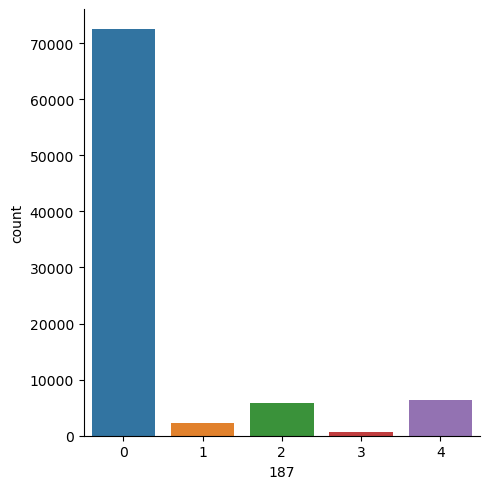

In [21]:
# Display counts of each classes - Most of Data samples are of normal HeartBeats & its a biased data

sns.catplot(x = 187, kind = 'count', data = train_data)

In [22]:
class_0=train_data[train_data[187]==0.0]
class_1=train_data[train_data[187]==1.0]
class_2=train_data[train_data[187]==2.0]
class_3=train_data[train_data[187]==3.0]
class_4=train_data[train_data[187]==4.0]
train_data = pd.concat([class_1, class_2, class_3, class_4, class_0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


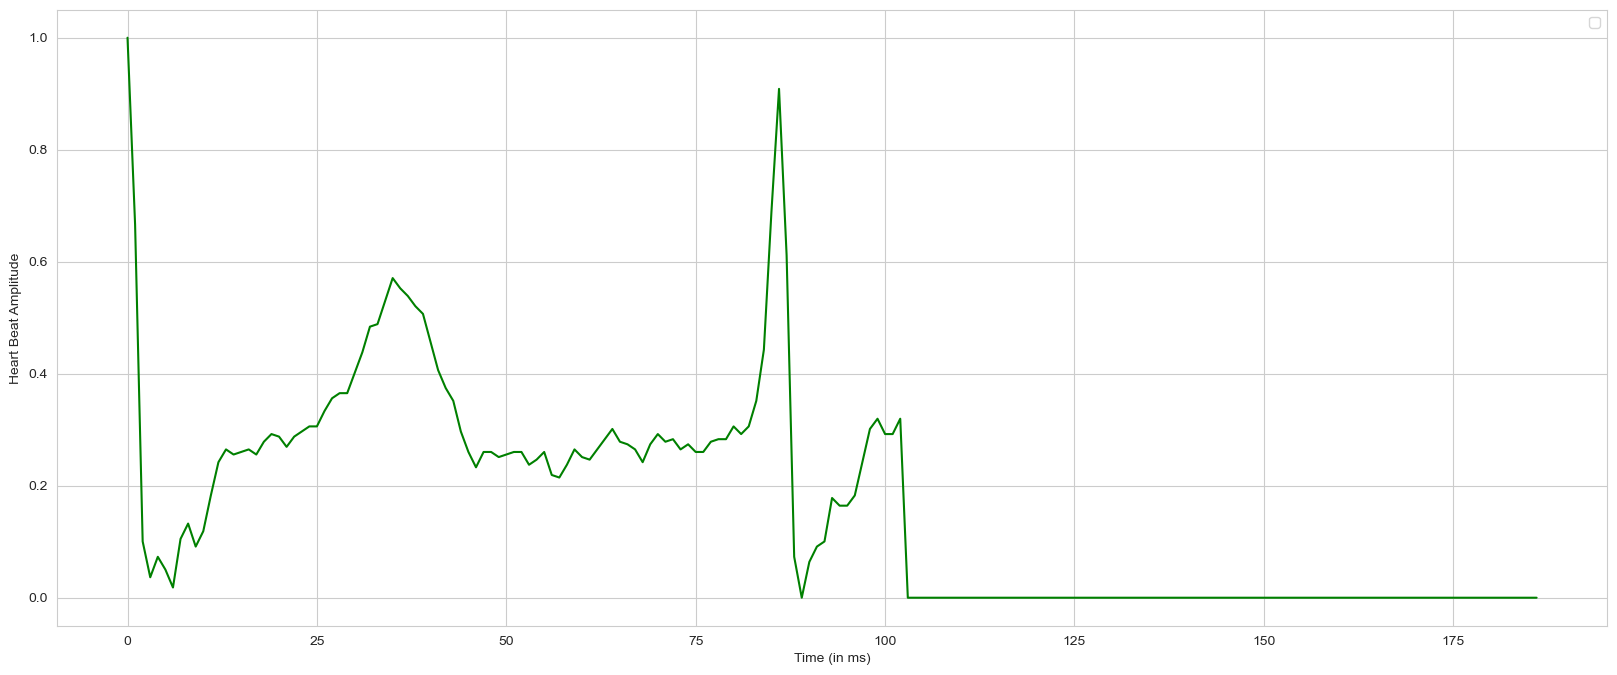

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize = (20,8))
plt.plot(train_data.iloc[0, 0:187], color = 'green')
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

In [24]:
# Balancing the data

# Upsampling is the increasing of the spatial resolution while keeping the 2D representation of an image.

class_1_upsample = resample(class_1, n_samples = 20000, replace = True, random_state = 123)
class_2_upsample = resample(class_2, n_samples = 20000, replace = True, random_state = 123)
class_3_upsample = resample(class_3, n_samples = 20000, replace = True, random_state = 123)
class_4_upsample = resample(class_4, n_samples = 20000, replace = True, random_state = 123)

In [25]:
# Downsampling is the reduction in spatial resolution while keeping the same two-dimensional (2D) representation

class_0_downsample = resample(class_0, n_samples = 20000, replace = True, random_state = 123)

In [26]:
# Join the data samples

train_data_1 = pd.concat([class_1_upsample, class_2_upsample, class_3_upsample, class_4_upsample, class_0_downsample])

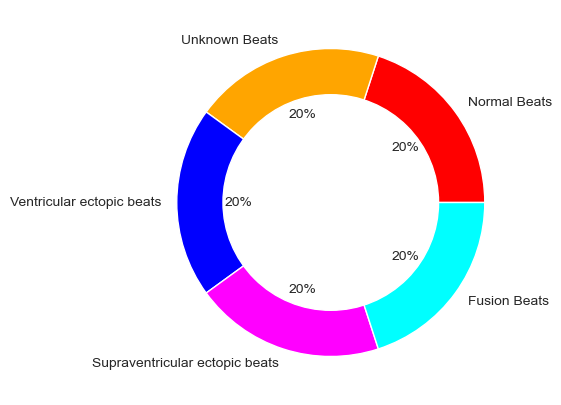

In [27]:
# Plotting the types of hearbeats

plt.figure(figsize= (5,5))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train_data_1[187].value_counts(), labels=['Normal Beats','Unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats',
                                                'Fusion Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [28]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale values
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)



In [29]:
from tensorflow.keras.utils import to_categorical
# define features and target
X_train_1 = pd.read_csv("mitbih_train.csv", header = None).iloc[:, train_data.columns != 187]
y_train_1 = pd.read_csv("mitbih_train.csv", header = None).iloc[:, train_data.columns == 187]
# y_train = to_categorical(y_train)
print(y_train)
X_test_1 = pd.read_csv("mitbih_test.csv", header = None).iloc[:, test_data.columns != 187]
y_test_1 = pd.read_csv("mitbih_test.csv", header = None).iloc[:, test_data.columns == 187]
# y_test = to_categorical(y_test)

       187
77102    2
65922    0
11365    0
36722    0
23017    0
...    ...
6265     0
54886    0
76820    2
860      0
15795    0

[70043 rows x 1 columns]


In [30]:
# Comparing ML Models

test_scores_models = [] 

start = time.time()

lr = LogisticRegression().fit(X_train_1, y_train_1)
print("------------------------LOGISTIC REGRESSION MODEL--------------------------------\n")   
print('Accuracy of Logistic Regression is', lr.score(X_test_1, y_test_1))
end = time.time()    
test_scores_models.append(lr.score(X_test_1, y_test_1))
print(f'Logistic Regression took {end-start} seconds to run\n')

# KNN
print("------------------------k-NN MODEL------------------------\n")
start = time.time()
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
print('Accuracy of KNN is', knn.score(X_test, y_test))
end = time.time()
test_scores_models.append(knn.score(X_test, y_test))

print(f'KNN took {end-start} seconds to run\n')

# DECISION TREE
print("------------------------DECISION TREE MODEL------------------------\n")
start = time.time()
dt = DecisionTreeClassifier(max_depth = 5).fit(X_train_1, y_train_1)
print('Accuracy of Decision Tree is', dt.score(X_test_1, y_test_1))
end = time.time()    
test_scores_models.append(dt.score(X_test_1, y_test_1))

print(f'Decision Tree took {end-start} seconds to run\n')


------------------------LOGISTIC REGRESSION MODEL--------------------------------

Accuracy of Logistic Regression is 0.91174858395761
Logistic Regression took 5.503031015396118 seconds to run

------------------------k-NN MODEL------------------------

Accuracy of KNN is 0.9725315515961396
KNN took 7.618012189865112 seconds to run

------------------------DECISION TREE MODEL------------------------

Accuracy of Decision Tree is 0.9325781107253791
Decision Tree took 9.53272819519043 seconds to run



 ========== Confusion Matrix for Logistic Regression Model ==========

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     18118
         1.0       0.85      0.35      0.50       556
         2.0       0.65      0.33      0.44      1448
         3.0       0.53      0.29      0.38       162
         4.0       0.95      0.87      0.91      1608

    accuracy                           0.91     21892
   macro avg       0.78      0.57      0.63     21892
weighted avg       0.90      0.91      0.90     21892



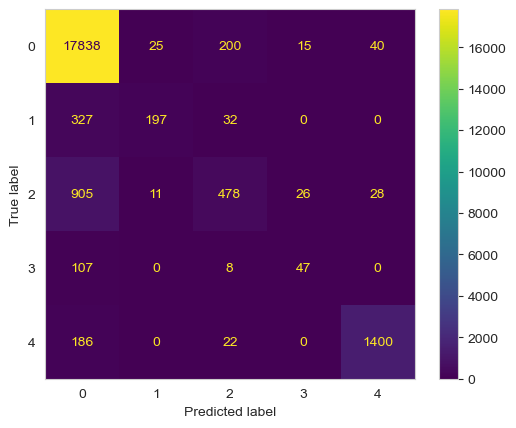

In [31]:
y_pred_lr = lr.predict(X_test_1)

print(" ========== Confusion Matrix for Logistic Regression Model ==========\n")
print(classification_report(y_test_1, y_pred_lr))
 
cm = confusion_matrix(y_test_1, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.grid(False)
plt.show()

 ========== Confusion Matrix for k-NN Model ==========

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     14579
           1       0.87      0.67      0.76       426
           2       0.91      0.86      0.89      1112
           3       0.86      0.74      0.79       145
           4       0.99      0.97      0.98      1249

    accuracy                           0.97     17511
   macro avg       0.92      0.85      0.88     17511
weighted avg       0.97      0.97      0.97     17511



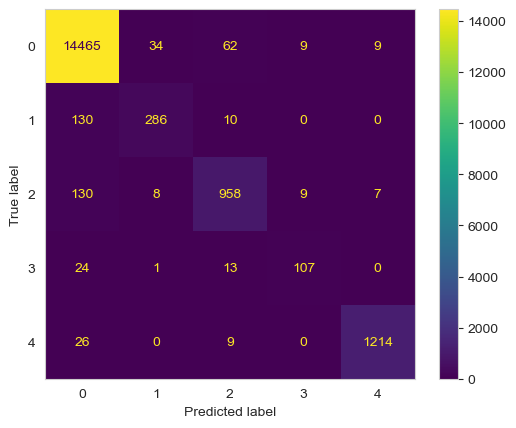

In [32]:
y_pred = knn.predict(X_test)

print(" ========== Confusion Matrix for k-NN Model ==========\n")
print(classification_report(y_test, y_pred))
 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.grid(False)
plt.show()

 ========== Confusion Matrix for Decision Tree Model ==========

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     18118
         1.0       0.50      0.42      0.45       556
         2.0       0.93      0.66      0.77      1448
         3.0       0.00      0.00      0.00       162
         4.0       0.96      0.85      0.90      1608

    accuracy                           0.93     21892
   macro avg       0.67      0.58      0.62     21892
weighted avg       0.92      0.93      0.93     21892



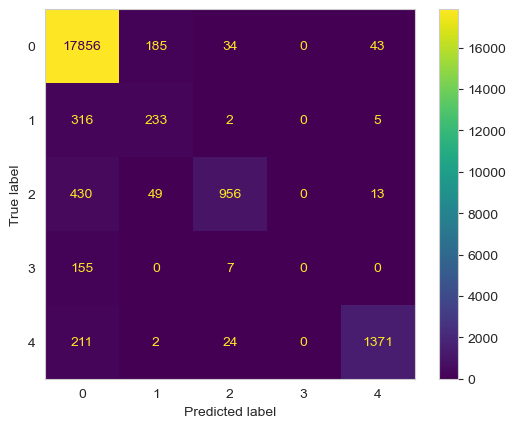

In [33]:
y_pred_dt = dt.predict(X_test_1)

print(" ========== Confusion Matrix for Decision Tree Model ==========\n")
print(classification_report(y_test_1, y_pred_dt))
 
cm = confusion_matrix(y_test_1, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.grid(False)
plt.show()

In [34]:
# Apply Keras Models

Y=train_data_1.values[:, -1].astype(int)
y=to_categorical(Y)
X_train_1, X_valid, y_train_1, y_valid = train_test_split(train_data_1.drop([187], axis=1), y, test_size = 0.3)

In [35]:

print("------------------------Nural Network------------------------")
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(187,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(X_train_1, y_train_1, epochs=10,validation_data=(X_valid, y_valid))

print("Evaluation: ")
mse, acc = model.evaluate(X_valid, y_valid)
print()
print("------------------------KERAS MODEL------------------------")  
print('mean_squared_error :', mse)
print('Keras model accuracy:', acc)

------------------------Nural Network------------------------
Epoch 1/10
2188/2188 [==============================] - 7s 3ms/step - loss: 0.5357 - accuracy: 0.8056 - val_loss: 0.3743 - val_accuracy: 0.8615
Epoch 2/10
2188/2188 [==============================] - 6s 3ms/step - loss: 0.3395 - accuracy: 0.8736 - val_loss: 0.2986 - val_accuracy: 0.8884
Epoch 3/10
2188/2188 [==============================] - 5s 2ms/step - loss: 0.2786 - accuracy: 0.8973 - val_loss: 0.2583 - val_accuracy: 0.9047
Epoch 4/10
2188/2188 [==============================] - 5s 3ms/step - loss: 0.2395 - accuracy: 0.9138 - val_loss: 0.2277 - val_accuracy: 0.9186
Epoch 5/10
2188/2188 [==============================] - 5s 2ms/step - loss: 0.2109 - accuracy: 0.9253 - val_loss: 0.2074 - val_accuracy: 0.9258
Epoch 6/10
2188/2188 [==============================] - 5s 3ms/step - loss: 0.1895 - accuracy: 0.9328 - val_loss: 0.1825 - val_accuracy: 0.9371
Epoch 7/10
2188/2188 [==============================] - 5s 2ms/step - loss

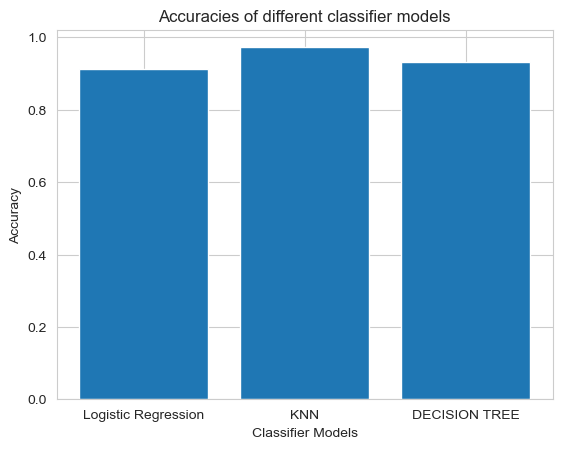

In [36]:
# Bar PLot

models = ['Logistic Regression', 'KNN', 'DECISION TREE']

plt.bar(models, test_scores_models)

plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')

plt.title('Accuracies of different classifier models')
plt.show()